

#Difficulty
1. Initialized parameters with np.random.rand which gives uniform distribution resulting in vanishing  gradients, changed to np.random.randn
1. paremeters goes to infinity in smaller batch sized once accuracy reaches 98%


#Activation Functions
##Here is a list of activation functions that can be utilized for different layers

In [ ]:
import numpy as np # inporting numpy

# creating dictionary of functions
functions=locals

#main functions that call other function and outputs the activation value
def activation_function(z,activation): 
  return eval(activation+"(z)")#calls the required function 
                              #and passes z and returns activation values
#first input=none
def none(z):
  return z#this function is never called just for illustration

#sigmoid activation and its derivative
def sigmoid(z):
  return np.array((1/(1+np.exp(-z))),float)

def grad_sigmoid(z):
  a=sigmoid(z)
  return np.array(np.multiply(a,1-a),float)

#relu activation and its derivative
def relu(z):
  return(np.multiply((z>0),z))

def grad_relu(z):
  return (z>=0)*1

#hyperbolic tanh activation and its derivative
def tanh(z):
  return np.tanh(z)

def grad_tanh(z):
  return 1-np.square(tanh(z))

#leaky relu activation and its derivative
def lrelu(z):
  return(relu(z)-0.1*relu(-z))

def grad_lrelu(z):
  return  (z>=0)+0.1*(z<0)

#swish activation and its derivative
def swish(z):
    return np.multiply(sigmoid(z),z)

def grad_swish(z):
    a=swish(z)
    return a+np.multiply(sigmoid(z),1-a)

def softmax(z):
    return np.exp(z-np.max(z)) / np.sum(np.exp(z), axis=0)

def grad_softmax(z):
    a = (softmax(z)).reshape(-1,1)
    da=(np.diagflat(a) - np.dot(a, a.T))
    return da


#Print Dictionary

In [ ]:
import pandas as pd
from tabulate import tabulate as tb
#this function takes in dictionary and prints them
def print_dictionary(dictionary,lenght_print=-1):
  layers=dictionary.keys()#obtaining keys for dictionary
  for _,value in enumerate(layers):#looping through keys
    temp=value
    print(temp)
    #prints the dictionary element in a table
    if lenght_print==-1:
      print(tb(pd.DataFrame((dictionary[value])[:,:]),headers='keys', tablefmt='psql'))
    else:
      print(tb(pd.DataFrame((dictionary[value])[:,:lenght_print]),headers='keys', tablefmt='psql'))


    print('\n')

     





#Shapes of Dictionary

In [ ]:
import pandas as pd
from tabulate import tabulate
def dictionary_shape(dictionary):
  layers=dictionary.keys()#obtaining keys for dictionary
  for _,value in enumerate(layers):#looping through keys
    print('Shape of ',value,'=',dictionary[value].shape)


#Declaring the parameters Weights(Theta) and Bias

In [ ]:
functions=locals
def parameters_declaration(layer_size_array,mode,multiplier=0.01):
  return eval('parameters_declaration_'+mode+'(layer_size_array,multiplier)')


##Random Initialization

In [ ]:
import numpy as np
def parameters_declaration_rand(layer_size_array,multiplier=0.01):
  parameters={}       #stores the weights and bias of the neural network
  size_n=0            #it stores the size of layer n
  size_n_1=0          #it stores the size of layer n-1
  counter=0           #it stores the value representing the layer
  for counter,size_n in enumerate(layer_size_array):
    if counter==0:  
      size_n_1=size_n #store the size of input layer 
                      #to calculate the weight and bias of next layer
      continue #the zeroth layer is input and doesn't have weights and bias
    #randomize the elements in weights and make a dictionary 
    parameters["theta"+str(counter)]=(np.random.randn(size_n,size_n_1).astype(float))*multiplier
    #zero initialization of bias for layer n
    parameters["beta"+str(counter)]=np.zeros((size_n,1)).astype(float)
    #store the size of input layer to calculate the weight and bias of nextlayer
    size_n_1=size_n 

  return parameters


##He Initialization

In [ ]:
import numpy as np
def parameters_declaration_he(layer_size_array,_):
  parameters={}       #stores the weights and bias of the neural network
  size_n=0            #it stores the size of layer n
  size_n_1=0          #it stores the size of layer n-1
  counter=0           #it stores the value representing the layer
  for counter,size_n in enumerate(layer_size_array,_):
    if counter==0:  
      size_n_1=size_n #store the size of input layer 
                      #to calculate the weight and bias of next layer
      continue #the zeroth layer is input and doesn't have weights and bias
    #randomize the elements in weights and make a dictionary 
    parameters["theta"+str(counter)]=(np.random.randn(size_n,size_n_1).astype(float))*np.sqrt(2/size_n_1)
    #zero initialization of bias for layer n
    parameters["beta"+str(counter)]=np.zeros((size_n,1)).astype(float)
    #store the size of input layer to calculate the weight and bias of nextlayer
    size_n_1=size_n 

  return parameters

## Xavier Initialization

In [ ]:
import numpy as np
def parameters_declaration_xavier(layer_size_array):
  parameters={}       #stores the weights and bias of the neural network
  size_n=0            #it stores the size of layer n
  size_n_1=0          #it stores the size of layer n-1
  counter=0           #it stores the value representing the layer
  for counter,size_n in enumerate(layer_size_array):
    if counter==0:  
      size_n_1=size_n #store the size of input layer 
                      #to calculate the weight and bias of next layer
      continue #the zeroth layer is input and doesn't have weights and bias
    #randomize the elements in weights and make a dictionary 
    parameters["theta"+str(counter)]=(np.random.randn(size_n,size_n_1).astype(float))*np.sqrt(2/(size_n_1+size_n))
    #zero initialization of bias for layer n
    parameters["beta"+str(counter)]=np.zeros((size_n,1)).astype(float)
    #store the size of input layer to calculate the weight and bias of nextlayer
    size_n_1=size_n 

  return parameters

#CSV File reader

In [ ]:
import numpy as np
import csv
def csv_reader_Y_X(filepath):
  data=[]
  Y=[] 
  with open(filepath,'r') as csvfile:
    file=csv.reader(csvfile)
    for row in file:
      data.append(row)
  #data[0][0]=0
  data=(np.array(data)).reshape(np.size(data,0),np.size(data,1))
  Y_temp=data[:,0].reshape(data.shape[0],1)
  X=(data[:,1:].reshape(data.shape[0],data.shape[1]-1)).T

  Y_data=np.array(np.unique(Y_temp))
  Y_data=Y_data.reshape(1,len(Y_data))

  Y=np.repeat(Y_temp,Y_data.shape[1],axis=1)
  Y=(Y==Y_data)*1

  return Y.T.astype(float),Y_data.T.astype(float),X.astype(float),Y_temp.T

#Cost Function

In [ ]:
import numpy as np
def computer_cost(Y,a,parameters,lambd=0,probability=1):  
  if probability !=1:
    print('Cost is not aplicalbe during dropout regularization')
    return 0
  else:
    cost_non_reg = -np.sum(np.multiply(Y,np.log(a))+np.multiply((1-Y),np.log(1-a)))/Y.shape[1]
    cost_reg_norm=0
    if lambd != 0:
      for param in range(1,int(len(parameters)/2)+1):
        cost_reg_norm+=np.sum(np.square(parameters['theta'+str(param)]))
      cost_reg_norm*=lambd/(2*Y.shape[1])
    cost=cost_non_reg+cost_reg_norm
    return cost
  

#Forward Propagation

In [ ]:
import numpy as np
def forward_propagation(parameters,layer_activation,X,probability=1):
  inputs={}
  layer_prob={}
  a_n=X
  inputs['a'+str(0)]=a_n
  if probability==1:#without_back_drop
    for layer in range(1,len(layer_activation)):
      z_n=np.dot(parameters['theta'+str(layer)],a_n)+parameters['beta'+str(layer)]
      a_n=activation_function(z_n,layer_activation[layer])
      inputs['z'+str(layer)]=z_n
      inputs['a'+str(layer)]=a_n    
  else:#back_drop
    for layer in range(1,len(layer_activation)):
      z_n=np.dot(parameters['theta'+str(layer)],a_n)+parameters['beta'+str(layer)]
      a_n=activation_function(z_n,layer_activation[layer])
      if layer < len(layer_activation)-1:
        p_n=np.random.rand(a_n.shape[0],a_n.shape[1])
        p_n=(p_n<probability).astype(int)
        a_n=np.multiply(a_n,p_n)/probability
        layer_prob['p'+str(layer)]=p_n
      inputs['z'+str(layer)]=z_n
      inputs['a'+str(layer)]=a_n
  return inputs,layer_prob
    

#Backward Propagation


In [ ]:
def backward_propagation(Y,inputs,layer_prob,layer_activation,parameters,lambd=0,probability=1):
  grads={}
  m=Y.shape[1]  
  layers=len(layer_activation)
  if probability==1:
    const=lambd/m
    for layer in range(layers-1,0,-1):
      if layer==layers-1:
        a_n=inputs["a"+str(layer)]
        da_n=-Y/a_n+(1-Y)/(1-a_n)
        dz_n=np.multiply(activation_function(inputs['z'+str(layer)],'grad_'+layer_activation[layer]),da_n)
        #dz_n=Y-a_n
      else:
        da_n=np.dot(parameters['theta'+str(layer+1)].T,dz_n)
        dz_n=dz_n=np.multiply(activation_function(inputs['z'+str(layer)],'grad_'+layer_activation[layer]),da_n)
   
      dWn=np.dot(dz_n,(inputs["a"+str(layer-1)]).T)/m 
      dbn=np.sum(dz_n,axis=1,keepdims=True)/m
      grads["dbeta"+str(layer)]=dbn+const*parameters["beta"+str(layer)]
      grads["dtheta"+str(layer)]=dWn
  else:
    for layer in range(layers-1,0,-1):
      if layer==layers-1:
        a_n=inputs["a"+str(layer)]
        da_n=-Y/a_n+(1-Y)/(1-a_n)
        dz_n=np.multiply(activation_function(inputs['z'+str(layer)],'grad_'+layer_activation[layer]),da_n)
      else:
        da_n=np.dot(parameters['theta'+str(layer+1)].T,dz_n)
        da_n=np.multiply(da_n,layer_prob['p'+str(layer)])/probability
        dz_n=dz_n=np.multiply(activation_function(inputs['z'+str(layer)],'grad_'+layer_activation[layer]),da_n)
   
      dWn=np.dot(dz_n,(inputs["a"+str(layer-1)]).T)/m 
      dbn=np.sum(dz_n,axis=1,keepdims=True)/m
      grads["dbeta"+str(layer)]=dbn
      grads["dtheta"+str(layer)]=dWn


  return grads

#Updata Parameters

In [ ]:
import numpy as np
def update_parameters(learning_rate,parameters,grads):
  layers=parameters.keys()#obtaining keys for dictionary
  for _,value in enumerate(layers):#looping through keys 
    parameters[value]=parameters[value]-learning_rate*grads["d"+value]
  return parameters


# Plotting cost

In [ ]:

import matplotlib.pyplot as plt
def plot(X,Y,X_title,Y_title,Title):
  plt.plot(X,Y)
  plt.xlabel(X_title)
  plt.ylabel(Y_title)
  plt.grid(True)
  plt.title(Title)
  plt.show()

#Train Neural Net

In [ ]:
def train_neural_net_BGD(parameters,epochs,layer_size_array,layer_activation,learning_rate,X,Y,cost_print,lambd=0,probability=1):
  cost=0
  for epoch in range(0,epochs):    
    inputs,layer_prob=forward_propagation(parameters,layer_activation,X,probability)
    grads=backward_propagation(Y,inputs,layer_prob,layer_activation,parameters,lambd,probability)
    parameters=update_parameters(learning_rate,parameters,grads)  
    if cost_print==1 :
      cost=computer_cost(Y,inputs["a"+str(len(layer_size_array)-1)],parameters,lambd)
  return parameters,cost

In [ ]:
def train_neural_net_MBGD(parameters,epochs,layer_size_array,layer_activation,learning_rate,X,Y,cost_print,batch_size=32,lambd=0,probability=1):
  cost=0
  no_batches,batch_X,batch_Y=mini_batch(X,Y)
  for epoch in range(0,epochs):
    for batch in range(no_batches):
      inputs,layer_prob=forward_propagation(parameters,layer_activation,np.array(batch_X[batch]),probability)
      grads=backward_propagation(np.array(batch_Y[batch]),inputs,layer_prob,layer_activation,parameters,lambd,probability)
      parameters=update_parameters(learning_rate,parameters,grads)  
    if cost_print==1 :
      cost=computer_cost(Y,predict_values(X,parameters,layer_activation),parameters,lambd)

    
  return parameters,cost


#Shuffle data

In [ ]:
def shuffle(X,Y):
  m=X.shape[1]
  mini_batches=[]
  shuffle=list(np.random.permutation(m))
  randomX=X[:,shuffle].reshape(X.shape[0],m)
  randomY=Y[:,shuffle].reshape((Y.shape[0],m))
  return randomX,randomY

#Mini Batches


In [ ]:
def mini_batch(X,Y):
  randomX,randomY=shuffle(X,Y)
  batch_X=[]
  batch_Y=[]
  m=randomX.shape[1]
  no_batches=int(m/batch_size)
  for batch in range(no_batches):
    batch_X.append(randomX[:,batch*batch_size:(batch+1)*batch_size])
    batch_Y.append(randomY[:,batch*batch_size:(batch+1)*batch_size])
  if m-(batch+1)*batch_size != 0:
    batch_X.append(randomX[:,(batch+1)*batch_size:])
    batch_Y.append(randomY[:,(batch+1)*batch_size:])
    no_batches+=1
  return no_batches,batch_X,batch_Y
  


#Predict


In [ ]:
def predict_values(X,parameters,layer_activation):
  a_n=X
  for layer in range(1,len(layer_activation)):
    z_n=np.dot(parameters['theta'+str(layer)],a_n)+parameters['beta'+str(layer)]
    a_n=activation_function(z_n,layer_activation[layer])
  return a_n

#Accuracy

In [ ]:
def accuracy_Y_Yhat(a_l,Y_data,Y_temp):
  a_l_temp=np.max(a_l,axis=0,keepdims=True)
  a_l=(a_l==a_l_temp)
  a_l=np.multiply(a_l,Y_data)
  a_l=np.sum(a_l,axis=0,keepdims=True)
  accuracy=(a_l==np.array(Y_temp,float))*1
  accuracy=np.sum(accuracy)*100/accuracy.shape[1]
  return accuracy


#Gradient Check

In [ ]:
import copy as cp
import numpy as np

def gradient_check(X,Y,layer_size_array,layer_activation,lambd=0,epsilon=1e-7):
  probability=1
  layer_prob={}

  parameters=parameters_declaration(layer_size_array)
  grad_riemann={}
  layers=parameters.keys()
  inputs,_=forward_propagation(parameters,layer_activation,X)
  grads=backward_propagation(Y,inputs,layer_prob,layer_activation,parameters,lambd,probability)
  derivative_param_i_j=0
  grad_with_back_prop=[]
  grad_with_riemann=[]
  for param in layers:
    temp=parameters[param] 
    gradient=[]
    for i in range(temp.shape[0]):
      for j in range(temp.shape[1]):
        #This part is calculation of gradients by rienmann sum
        temp_parameters_pos=cp.deepcopy(parameters)
        temp_parameters_neg=cp.deepcopy(parameters)
        temp_parameters_pos[param][i,j]=temp_parameters_pos[param][i,j]+epsilon
        temp_parameters_neg[param][i,j]=temp_parameters_neg[param][i,j]-epsilon
        a_n_pos=predict_values(X,temp_parameters_pos,layer_activation)
        a_n_neg=predict_values(X,temp_parameters_neg,layer_activation)
        derivative_param_i_j=(computer_cost(Y,a_n_pos,parameters,lambd,probability)-computer_cost(Y,a_n_neg,parameters,lambd,probability))/(2*epsilon)
        gradient.append(derivative_param_i_j)
        grad_with_riemann.append(derivative_param_i_j)#1d array
        grad_with_back_prop.append(grads['d'+param][i,j])#1d array
    #appending the reienmann sum for derivatives
    grad_riemann['d'+param]=np.array(gradient).reshape((temp.shape[0],temp.shape[1]))
  
  grad_with_riemann=np.array(grad_with_riemann)
  grad_with_back_prop=np.array(grad_with_back_prop)
  difference=np.sum(np.square(grad_with_riemann-grad_with_back_prop))\
                                  /\
      (np.sum(np.square(grad_with_riemann))+np.sum(np.square(grad_with_back_prop)))
  return difference,grad_riemann,grads

#Show nth Image

In [ ]:
from PIL import Image
def show_image(X,i):
  img=X[:,i].reshape((int(np.sqrt(X.shape[0])),int(np.sqrt(X.shape[0]))))  
  im = Image.fromarray(img.astype('uint8')*255)
  display(im)

#Using all of the above


In [ ]:
import numpy as np
[Y,Y_data,X,Y_temp]=csv_reader_Y_X('/content/sample_data/mnist_train_small.csv')


In [ ]:
layer_size_array=[X.shape[0],32,Y.shape[0]]
layer_activation=['none','relu','sigmoid']



In [ ]:
learning_rate=0.001
cost_print=1
epochs=200
lambd=0
probability=1
mode='rand'
multiplier=0.01
batch_size=2048


In [ ]:
parameters=parameters_declaration(layer_size_array,mode,multiplier)
accuracy_n=[]
cost_n=[]


In [ ]:
#print_dictionary(parameters)

------------
-0.00501058
-0.00459884
-0.00592651
-0.00747885
-0.00334337
-0.000302394
-0.00333229
-0.00548833
 0.00199359
-0.00354619
------------
Cost     after 0epochs: 0.07710218193889855
accuracy after 0epochs: 99.37
------------
-0.00501106
-0.00460038
-0.00592706
-0.00748029
-0.00334424
-0.000302855
-0.00333279
-0.00549012
 0.00199485
-0.00354733
------------
Cost     after 10epochs: 0.07698724974883885
accuracy after 10epochs: 99.375
------------
-0.00501157
-0.00460192
-0.0059276
-0.00748173
-0.00334509
-0.000303324
-0.00333329
-0.0054919
 0.00199609
-0.00354846
------------
Cost     after 20epochs: 0.07687292482919038
accuracy after 20epochs: 99.375
------------
-0.00501209
-0.00460346
-0.00592812
-0.0074832
-0.00334593
-0.000303804
-0.00333379
-0.00549367
 0.00199733
-0.00354959
------------
Cost     after 30epochs: 0.07675904380539741
accuracy after 30epochs: 99.38
------------
-0.00501263
-0.00460501
-0.00592863
-0.00748466
-0.00334675
-0.000304304
-0.0033343
-0.00549542
 0

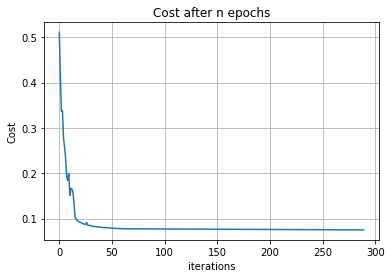

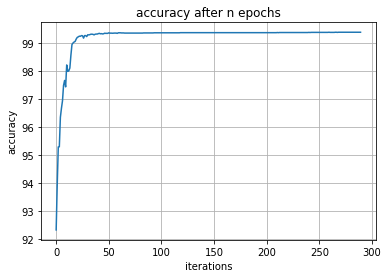

In [ ]:
for epoch in range(0,epochs):
  parameters,cost=train_neural_net_BGD(parameters,1,layer_size_array,layer_activation,learning_rate,X,Y,cost_print,lambd,probability)
  a_l=predict_values(X,parameters,layer_activation)
  accuracy_n.append(accuracy_Y_Yhat(a_l,Y_data,Y_temp))
  if probability==1:
    cost_n.append(cost)
  if epoch%10==0:
    #print(tb(parameters['beta2']))
    if probability==1:
      print('Cost     after '+str(epoch)+ 'epochs: '+str(cost))
    print('accuracy after '+str(epoch)+ 'epochs: '+str(accuracy_n[-1]))
plot(range(len(cost_n)),cost_n,'iterations','Cost','Cost after n epochs')
plot(range(len(accuracy_n)),accuracy_n,'iterations','accuracy','accuracy after n epochs')

In [ ]:
print_dictionary(parameters)

In [ ]:
import numpy as np
[Y,Y_data,X,Y_temp]=csv_reader_Y_X('/content/sample_data/mnist_test.csv')


In [ ]:
a_l=predict_values(X,parameters,layer_activation)

In [ ]:
accuracy=accuracy_Y_Yhat(a_l,Y_data,Y_temp)

In [ ]:
print(accuracy)


95.84


In [ ]:
print(tb(a_l))

-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ----------- 

In [ ]:
a=(a_l==np.max(a_l,axis=0,keepdims=True))*1
print(tb(a))

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -

In [ ]:
a_n=np.sum(a*Y_data,axis=0,keepdims=True)
print(tb(a_n))
print('~'*1000)
print(tb(Y_temp))

-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -

In [ ]:
pre=(a_n==np.array(Y_temp,float))*1

In [ ]:
print(np.sum(pre)/pre.shape[1])

0.9584
